mean of A :  0.0013239999999999999
mean of B :  0.005352000000000001
mean of C :  0.025748000000000004
mean of D :  0.03149199999999999
mean of E :  0.21419999999999997
[[ 3.02662400e-06  2.50179520e-05  5.05012480e-05  8.94893920e-05 -6.71200000e-06]
 [ 2.50179520e-05  2.88131296e-04  5.56346704e-04  9.89896416e-04 -1.46978640e-03]
 [ 5.05012480e-05  5.56346704e-04  3.95864570e-03  5.56744678e-03  6.93648280e-03]
 [ 8.94893920e-05  9.89896416e-04  5.56744678e-03  9.01748074e-03 -7.09982000e-04]
 [-6.71200000e-06 -1.46978640e-03  6.93648280e-03 -7.09982000e-04  9.97689252e-01]]


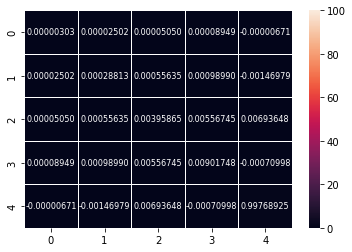

,0,1,2,3,4
0,0.0000030266,0.0000250180,0.0000505012,0.0000894894,-0.0000067120
1,0.0000250180,0.0002881313,0.0005563467,0.0009898964,-0.0014697864
2,0.0000505012,0.0005563467,0.0039586457,0.0055674468,0.0069364828
3,0.0000894894,0.0009898964,0.0055674468,0.0090174807,-0.0007099820
4,-0.0000067120,-0.0014697864,0.0069364828,-0.0007099820,0.9976892520


In [61]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import math
from numpy.random import rand
import pandas as pd

# Building the Population Covariance Matrix of Returns and Computing Mean of Returns

# Portfolio variance = pTCp

# Portfolio variance = ProprtionsMatT * CovarianceMatrixReturns



A = [ 0.0012, 0.0013, 0.0013, 0.0011, 0.0011, 0.0013, 0.0012, 0.0013, 0.0013, 0.0011, 0.0008, 0.0007, 0.0097, 0.0007, 0.0007, 0.0006, 0.0006, 0.0005, 0.0006, 0.0006, 0.0006, 0.0007, 0.0011, 0.0013, 0.0017 ]
Amu = np.mean(A)
print("mean of A : ", Amu)

B = [ -0.0032, 0.0030, -0.0004, -0.0086, -0.0018, .0115, 0.0074, 0.0034, 0.0082, -.0123, -.0145, -0.0071, 0.0750, 0.0014, 0.0099, -0.0042, -0.0003, -0.0081, 0.0149, 0.0063, 0.0046, 0.0178, -0.0064, 0.0182, 0.0191 ] 
Bmu = np.mean(B)
print("mean of B : ", Bmu)

C = [ 0.0448, -0.0069, 0.0700, -0.0465, 0.0303, 0.0237, 0.0233, 0.0069, 0.0533, 0.0438, 0.0276, -0.0101, 0.1831, 0.0384, 0.1095, -0.0266, -0.0380, 0.0719, 0.0564, 0.0199, 0.0476, 0.1281, -0.1240, -0.0824, -0.0004 ]
Cmu = np.mean(C)
print("mean of C : ", Cmu)

D = [ 0.0058, -0.0503, 0.0543, -0.0400, 0.0200, -0.0124, 0.0346, -0.0066, 0.0423, -0.0039, 0.0521, 0.0285, 0.3185, 0.0724, 0.1826, 0.0050, -0.0304, 0.0720, 0.0571, 0.0400, 0.0879, 0.1581, -0.2140, -0.0801, -0.0062 ]
Dmu = np.mean(D)
print("mean of D : ", Dmu)

E = [ 5.10, -0.0466, 0.0246, -0.0281, 0.0176, 0.0072, -0.0144, 0.0361, 0.0309, 0.0235, 0.0226, -0.0109, 0.0817, 0.0464, 0.1554, -0.0397, -0.0260, 0.0512, 0.0233, 0.0344, 0.0450, 0.0642, -0.1387, -0.0774, -0.0273 ] 
Emu = np.mean(E)
print("mean of E : ", Emu)
   
data = np.array([A, B, C, D, E])

# Population Covariance Matrix 
covMatrix = np.cov(data,bias=True)
np.set_printoptions( linewidth=100)
print (covMatrix)

#sn.heatmap(covMatrix, annot=True, fmt='g')
sn.heatmap(covMatrix, annot=True, fmt='0.8f', linewidths=.5, annot_kws={"size": 8}, vmin=0.0, vmax=100.0)
plt.show()

pd.set_option('precision',10)
df = pd.DataFrame(data=covMatrix)
df




In [62]:
import numpy as np
from scipy.optimize import minimize
import math
from numpy.random import rand

# Expected Value portfolio return = 0.005
# Proportion of Investment A == x[0]
# invest_A = x[0], B = x[1], C = x[2], D = x[3], E = x[4]

# Objective Function, Minimize Portfolio Variance
# Portfolio variance = Sum( variance of A*Proportion_of_invst-A**2 ) + 2 Sum( covariance of A n B * proprtion of A n B)

# Constraint
# Profit at least expected return
# Sum of mean returns x proportion of investment 
# ( Amu * x0 + Bmu * x1 + Cmu * x2 + Dmu * x3 + Emu * x4 ) >= Ex[0]

# Constraint
# Sum of investment proportion == 1
# x0 + x1 + X2 + x3 + x4 == 1

# All proportions greater than 0 and less than 1, bounds variable below

# Expected Values Returns array 
Ex = [ 0.005, 0.01, 0.015, 0.02, 0.025, 0.03 ] 

def objective(x):
    sum1 = covMatrix[0,0]*(x[0]**2) + covMatrix[1,1]*(x[1]**2) + covMatrix[2,2]*(x[2]**2) + covMatrix[3,3]*(x[3]**2) + covMatrix[4,4]*(x[4]**2)
    sum2 = covMatrix[1,0]*x[1]*x[0] + covMatrix[2,0]*x[2]*x[0] + covMatrix[3,0]*x[3]*x[0] + covMatrix[4,0]*x[4]*x[0] + \
    covMatrix[2,1]*x[2]*x[1] + covMatrix[3,1]*x[3]*x[1] + covMatrix[4,1]*x[4]*x[1] + covMatrix[3,2]*x[3]*x[2] + \
    covMatrix[4,2]*x[4]*x[2] + covMatrix[4,3]*x[4]*x[3] 
    
    return sum1 + 2 * sum2 
        

def constraint1(x):
    return 1 - (x[0] + x[1] + x[2] + x[3] + x[4]) 

def constraint2_1(x):
    return  Amu*x[0] + Bmu * x[1] + Cmu * x[2] + Dmu * x[3] + Emu * x[4] - Ex[0]

def constraint2_2(x):
    return  Amu*x[0] + Bmu * x[1] + Cmu * x[2] + Dmu * x[3] + Emu * x[4] - Ex[1]

def constraint2_3(x):
    return  Amu*x[0] + Bmu * x[1] + Cmu * x[2] + Dmu * x[3] + Emu * x[4] - Ex[2]

def constraint2_4(x):
    return  Amu*x[0] + Bmu * x[1] + Cmu * x[2] + Dmu * x[3] + Emu * x[4] - Ex[3]

def constraint2_5(x):
    return  Amu*x[0] + Bmu * x[1] + Cmu * x[2] + Dmu * x[3] + Emu * x[4] - Ex[4]

def constraint2_6(x):
    return  Amu*x[0] + Bmu * x[1] + Cmu * x[2] + Dmu * x[3] + Emu * x[4] - Ex[5]



def solution(cons):
    solution = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)
    x = solution.x

    # show final objective
    print('Final SSE Objective: ' + str(objective(x)))

    # print solution
    print('Solution')
    print('xA = ' + str(x[0]))
    print('xB = ' + str(x[1]))
    print('xC = ' + str(x[2]))
    print('xD = ' + str(x[3]))
    print('xE = ' + str(x[4]))
    
    print( 'Sum = ' + str(sum(x)) ) 
    
    # returns the Portfolio Variance (optimal minimized)
    return objective(x)


# initial guesses
n = 5
x0 = np.zeros(n)
#x0 = [ 0.2, 0.2, 0.2, 0.2, 0.2 ]
x0[0] = rand()  # or 0.0
x0[1] = rand()  # or 0.0
x0[2] = rand()
x0[3] = rand()
x0[4] = rand()

# show initial objective
print('Initial SSE Objective: ' + str(objective(x0)))

# optimize
b = (0.0, 1.0)
bnds = (b, b, b, b, b)

# Expected Values, Optimal Variances computed 
Vr = []

con1 = {'type': 'eq', 'fun': constraint1} 
con2 = {'type': 'ineq', 'fun': constraint2_1}
cons = ([con1,con2])
#solution(cons)
Vr.append(solution(cons))

con2 = {'type': 'ineq', 'fun': constraint2_2}
cons = ([con1,con2])
Vr.append(solution(cons))

con2 = {'type': 'ineq', 'fun': constraint2_3}
cons = ([con1,con2])
Vr.append(solution(cons))

con2 = {'type': 'ineq', 'fun': constraint2_4}
cons = ([con1,con2])
Vr.append(solution(cons))

con2 = {'type': 'ineq', 'fun': constraint2_5}
cons = ([con1,con2])
Vr.append(solution(cons))

con2 = {'type': 'ineq', 'fun': constraint2_6}
cons = ([con1,con2])
Vr.append(solution(cons))




Initial SSE Objective: 0.018898960352142915
Final SSE Objective: 0.00013339819896379768
Solution
xA = 0.42917147912017334
xB = 0.5551762827614868
xC = 0.0009966584842240331
xD = 0.009328620660059843
xE = 0.005326958974056151
Sum = 1.0
Final SSE Objective: 0.0005052925978779837
Solution
xA = 0.34932571742219387
xB = 0.499060840466975
xC = 0.01835794500052491
xD = 0.12122889373806826
xE = 0.012026603372237927
Sum = 1.0
Final SSE Objective: 0.001200727719300281
Solution
xA = 0.26875036362819565
xB = 0.44014356191540016
xC = 0.05191135623655093
xD = 0.22048074560095324
xE = 0.01871397261889998
Sum = 0.9999999999999999
Final SSE Objective: 0.0018925856933558476
Solution
xA = 0.06585300510319125
xB = 0.3726925458186824
xC = 0.5430846204244222
xD = 5.0306980803327406e-17
xE = 0.018369828653704047
Sum = 0.9999999999999999
Final SSE Objective: 0.0030591995619652463
Solution
xA = 0.0
xB = 0.2558112352522032
xC = 0.7204717123261535
xD = 0.0
xE = 0.02371705242164348
Sum = 1.0000000000000002
Final 

In [60]:
# Plotting required rates of return (baseline rates) versus the variance obtained (objective function) 
# to generate a plot called the efficient frontier

#fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10,4))


#ax1.plot(Ex, Vr, 'o-', c='r', label='Pareto optimal front')
#ax1.legend(loc='best')
#ax1.set_xlabel('Expected Returns Ex ')
#ax1.set_ylabel('Portfolio Variances Vr')
#ax1.grid(True)
#fig.tight_layout()
#plt.show()



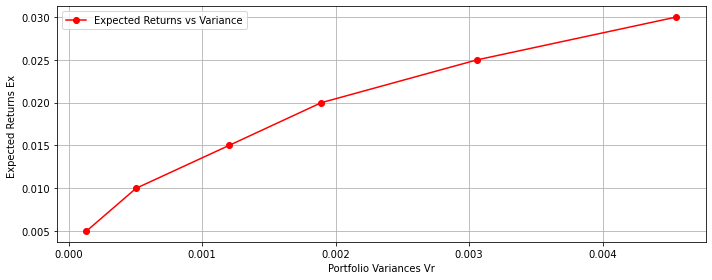

In [63]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10,4))


ax1.plot(Vr, Ex, 'o-', c='r', label='Expected Returns vs Variance')
ax1.legend(loc='best')
ax1.set_xlabel('Portfolio Variances Vr')
ax1.set_ylabel('Expected Returns Ex ')
ax1.grid(True)
fig.tight_layout()
plt.show()